#Netflix and IMDB scores Analysis

##**Objective:**
Create an interactive Power BI dashboard and use Python to analyze Netflix shows' IMDb scores. The dashboard should visually represent ratings, genres, and trends, aiming to derive insights into viewer preferences. The goal is to provide a comprehensive view of IMDb scores distribution, genre popularity, and how ratings have evolved over time for Netflix shows.


##**Business Context:**
Understanding viewer preferences is crucial for Netflix to make informed decisions about content creation and acquisition. Analyzing IMDb scores can provide insights into which shows are resonating well with the audience, helping Netflix optimize its content strategy. The dashboard will assist in identifying popular genres, trends in viewer ratings, and potential correlations between release years, IMDb scores, and other factors.

##**Data Dictionary:**

1. **index:** Unique identifier for each record.
2. **id:** Identifier for the show.
3. **title:** Title of the Netflix show.
4. **type:** Type of the show (e.g., movie, TV show).
5. **description:** Brief description of the show.
6. **release_year:** Year when the show was released.
7. **age_certification:** Certification indicating the age group for which the show is suitable.
8. **runtime:** Duration of the show in minutes.
9. **imdb_id:** IMDb identifier for the show.
10. **imdb_score:** IMDb score of the show.
11. **imdb_votes:** Number of IMDb votes for the show.

This data dictionary provides a clear understanding of the fields available in the dataset, including identifiers, textual information, numerical values, and IMDb-related metrics. The dashboard will leverage these attributes to create meaningful visualizations that help extract actionable insights regarding viewer preferences for Netflix shows.

##Importing Libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

##Importing the dataset

In [2]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DecoderBot/Task 1- Netflix TV Shows and Movies.csv',index_col=False)

## Data Overview

###Data First 5 and last 5 rows

In [4]:
data.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.300,795222.000
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.200,530877.000
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.000,392419.000
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.100,391942.000
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.800,72895.000


In [5]:
data.tail()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.800,26.000
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.900,39.000
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.500,32.000
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.200,9.000
5282,5282,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,0,tt13711094,8.800,16.000


###Check the data types of the columns for the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


There are 2 float columns, 3 integer columns ad 6 object/string columns

###Understand the shape of the dataset

In [7]:
# checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 5283 rows and 11 columns.


###Let's check the statistical summary of the data.

In [8]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,5283.000,NaN,NaN,NaN,2641.000,1525.215,0.000,1320.500,2641.000,3961.500,5282.000
id,5283,5283,tm84618,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,5283,5237,The Gift,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,5283,2,MOVIE,3407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,5278,5276,"Away from school, during the winter holidays, ...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,5283.000,NaN,NaN,NaN,2015.880,7.346,1953.000,2015.000,2018.000,2020.000,2022.000
age_certification,2998,11,TV-MA,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
runtime,5283.000,NaN,NaN,NaN,79.200,38.916,0.000,45.000,87.000,106.000,235.000
imdb_id,5283,5283,tt0075314,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
imdb_score,5283.000,NaN,NaN,NaN,6.533,1.161,1.500,5.800,6.600,7.400,9.600


1. The dataset comprises 5283 records with unique identifiers, and the most frequent show identifier is 'tm84618', appearing once.

2. Show titles are diverse, with 5283 unique titles. 'The Gift' is the most common title, occurring three times.

3. The 'type' column indicates two show types: 'MOVIE' and 'TV SHOW', with 'MOVIE' being the most prevalent, appearing in 3407 records.

4. Show descriptions vary, with 5278 unique descriptions. The most common description appears twice and is related to winter holidays.

5. The dataset spans release years from 1953 to 2022, with an average release year of 2015.88. IMDb scores range from 1.5 to 9.6, with an average score of 6.533, and IMDb votes range from 5 to 2268288, with an average of 23407.195 votes.

###Checking for missing values in the data

In [9]:
data.isnull().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64


It appears that the 'age_certification' column has 2285 missing values,the 'imdb_votes' column has 16 missing values in the dataset and the description is missing for 5 rows.

###Checking for duplicate entries in the data

In [10]:
data.duplicated().sum()

0

There is no dublicate values in the dataset

###Checking Unique values for categorical columns

In [11]:
# Making a list of all categorical variables
cat_cols =  ['type','age_certification','imdb_score','release_year']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 50)

MOVIE    3407
SHOW     1876
Name: type, dtype: int64
--------------------------------------------------
TV-MA    792
R        548
TV-14    436
PG-13    424
PG       238
TV-PG    172
G        105
TV-Y7    104
TV-Y      94
TV-G      72
NC-17     13
Name: age_certification, dtype: int64
--------------------------------------------------
6.600    201
6.800    199
6.500    193
6.200    192
7.400    190
        ... 
2.000      1
1.900      1
2.400      1
1.600      1
1.800      1
Name: imdb_score, Length: 81, dtype: int64
--------------------------------------------------
2019    749
2018    733
2021    687
2020    657
2017    555
       ... 
1974      1
1959      1
1962      1
1978      1
1985      1
Name: release_year, Length: 66, dtype: int64
--------------------------------------------------


##Univariate Analysis

###Analysis on title

In [12]:
data['title'].nunique()

5237

There are 5283 rows in the dataset and the unique values are only 5237. Lets look at the duplicate titles.

In [13]:
duplicate_titles = data[data['title'].duplicated(keep=False)]

In [14]:
duplicate_titles.shape

(91, 11)

In [15]:
duplicate_titles[duplicate_titles['title']=='The Gift']

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
1171,1171,tm199607,The Gift,MOVIE,Simon and Robyn are a young married couple who...,2015,R,108,tt4178092,7.100,151679.000
2652,2652,tm362264,The Gift,MOVIE,Mashotoâ€™s life in the city is a hustle. Itâ€...,2017,NaN,85,tt6856604,8.100,20.000
3218,3218,ts223344,The Gift,SHOW,A painter in Istanbul embarks on a personal jo...,2019,TV-MA,45,tt10075318,7.000,21582.000


In [16]:
duplicate_titles.groupby('title')['release_year'].value_counts(ascending=False)

title                      release_year
A Nightmare on Elm Street  1984            1
                           2010            1
A Second Chance            2011            1
                           2015            1
Always Be My Maybe         2016            1
                                          ..
Warrior                    2018            1
Zero                       2018            1
                           2021            1
Zoo                        2015            1
                           2018            1
Name: release_year, Length: 89, dtype: int64

In [17]:
title_counts = data['title'].value_counts()
titles_more_than_2 = title_counts[title_counts > 1]

print(titles_more_than_2)

The Gift                             3
Taxi Driver                          2
Time Out                             2
Love O2O                             2
U Turn                               2
Zoo                                  2
Into the Wind                        2
Monster                              2
Danger Mouse                         2
Cloudy with a Chance of Meatballs    2
She's Gotta Have It                  2
The Chase                            2
The Forest                           2
Kakegurui                            2
Heist                                2
A Nightmare on Elm Street            2
Christine                            2
The Heirs                            2
Shooter                              2
A Second Chance                      2
Extraction                           2
Always Be My Maybe                   2
Connected                            2
Zero                                 2
Skylines                             2
Cargo                    


I've identified 45 instances of duplicate titles, but upon closer examination, they are distinct records with identical titles. Confirmation can be obtained by cross-referencing the release year in the duplicate dataframe. Notably, there are three movies/shows titled "The Gift," each released in different years and featuring distinct storylines. It's intriguing that among these, one is a TV show, while the other two are movies.

###Analysis on Type

In [18]:
data['type'].value_counts(normalize=True)

MOVIE   0.645
SHOW    0.355
Name: type, dtype: float64

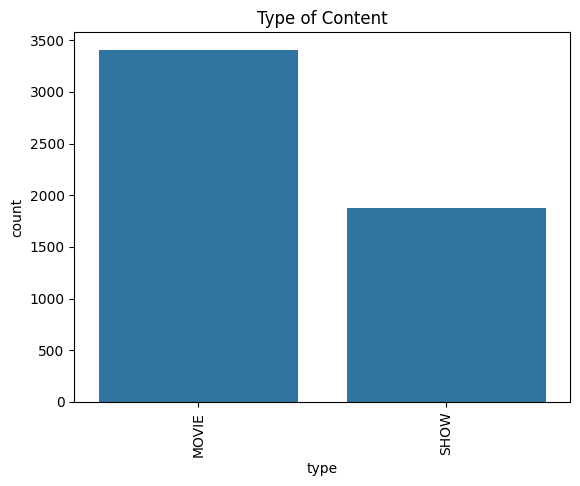

In [19]:
#Countplot of Cuisine Type
sns.countplot(data=data,x='type')
plt.xticks(rotation=90)
plt.title('Type of Content');

The dataset is composed of 65% movies and 35% TV shows, indicating a predominant representation of movies in the content library.







###Analysis on release_year
     

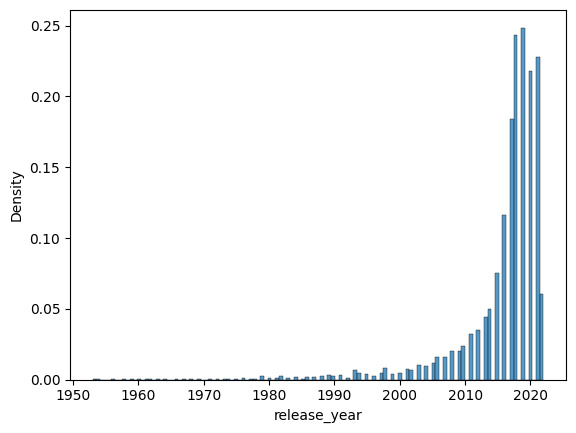

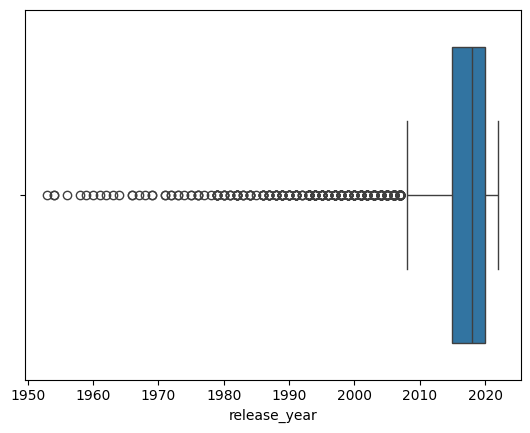

In [20]:
sns.histplot(data=data,x='release_year',stat='density')
plt.show()
sns.boxplot(data=data,x='release_year')
plt.show()

In [21]:
bins = [0, 2000, 2010, 2020, float('inf')]
labels = ['Less than 2000', '2000-2010', '2010-2020', 'Greater than 2020']

#Creating a cat variable to understand better
data_bins=data.copy()
data_bins['release_year_bins'] = pd.cut(data_bins['release_year'], bins=bins, labels=labels, right=False)


In [22]:
data_bins['release_year_bins'].value_counts()

2010-2020            3172
Greater than 2020    1526
2000-2010             369
Less than 2000        216
Name: release_year_bins, dtype: int64

In [23]:
data[data['release_year'] == 2021].shape

(687, 11)

In [24]:
data[data['release_year'] == 2022].shape

(182, 11)

 Netflix has a diverse content library, with a significant emphasis on recent releases (2010-2020), while also providing a mix of older titles. The continuous addition of content beyond 2020 suggests a commitment to staying current and more movies/shows coming in.

###Analysis on age_certification

In [25]:
data['age_certification'].unique()

array(['R', 'PG', 'TV-14', 'G', 'PG-13', nan, 'TV-MA', 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'NC-17'], dtype=object)

There are Null values in the dataset as observed earlier. Lets try to visualize with the data that's available.

In [26]:
# Drop rows with NaN values in the specified column
df_no_nan = data.dropna(subset=['age_certification'])

In [27]:
# Count occurrences of each category
df_no_nan['age_certification'].value_counts(normalize=True)


TV-MA   0.264
R       0.183
TV-14   0.145
PG-13   0.141
PG      0.079
TV-PG   0.057
G       0.035
TV-Y7   0.035
TV-Y    0.031
TV-G    0.024
NC-17   0.004
Name: age_certification, dtype: float64

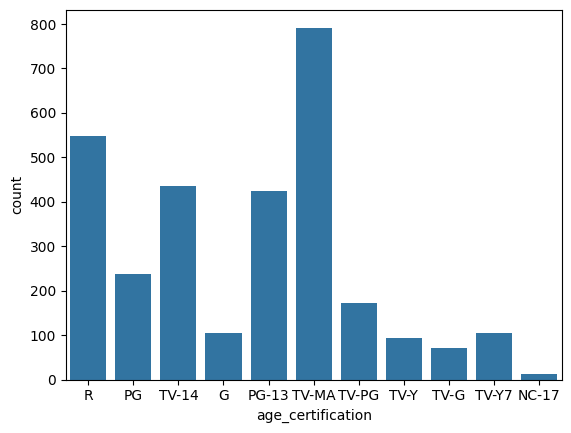

In [28]:
# Create a countplot without NaN values
sns.countplot(data=df_no_nan, x='age_certification')

# Show the plot
plt.show()

The 'age certification' column contains approximately 2285 out of 5283 null or missing values. When analyzing the data excluding these null values, TV-MA comprises 26% of the dataset, closely followed by R with 18%.

###Analysis on runtime

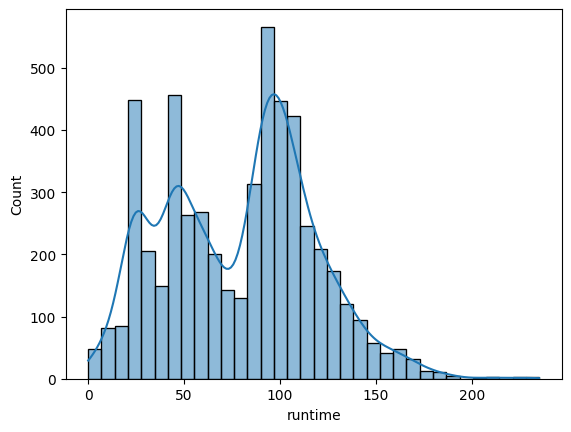

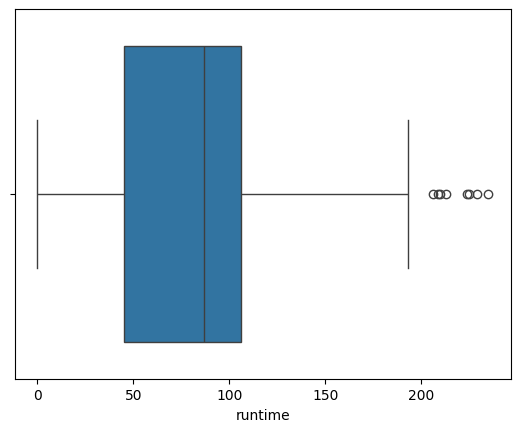

In [29]:
sns.histplot(data=data,x='runtime',kde=True)
plt.show()
sns.boxplot(data=data,x='runtime')
plt.show()

In [30]:
data[data['runtime']==0]

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
450,450,ts74931,Kung Fu Panda Awesome Secrets,SHOW,"In this pair of adventures, Po tells the story...",2008,NaN,0,tt6963796,7.200,55.000
455,455,ts98252,Dreamworks Happy Holidays from Madagascar,SHOW,Madagascar goes wild with holiday spirit in th...,2005,TV-PG,0,tt6929194,6.500,96.000
535,535,ts67595,Pedro El Escamoso,SHOW,Pedro el escamoso is a popular telenovela film...,2001,TV-14,0,tt0283770,7.500,303.000
840,840,ts99814,Masameer,SHOW,A popular Saudi animation show talks sarcastic...,2011,TV-MA,0,tt6298258,8.200,677.000
2503,2503,ts74765,Daughters of Destiny,SHOW,Five girls from India's most impoverished fami...,2017,NaN,0,tt1877895,8.600,900.000
2996,2996,ts250172,Afronta!,SHOW,Afronta invites contemporary black artists and...,2017,TV-PG,0,tt12467250,7.400,8.000
3528,3528,ts268592,Beyblade Burst Rise,SHOW,"Beyblade Burst Rise, also known as Beyblade Bu...",2019,NaN,0,tt11916718,5.700,156.000
3733,3733,ts217719,Basketball or Nothing,SHOW,the lives of the Chinle High School boys' bask...,2019,TV-PG,0,tt10698408,7.400,614.000
3743,3743,ts255418,Bad Boy Billionaires: India,SHOW,This investigative docuseries explores the gre...,2020,TV-14,0,tt12923630,7.900,3010.000
3757,3757,ts237071,The Forest of Love: Deep Cut,SHOW,Nothing's as it seems when a charismatic conma...,2020,TV-MA,0,tt12079236,6.800,426.000


In [31]:
data[data['runtime'] >200]

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
24,24,tm76557,No Longer Kids,MOVIE,"By coincidence, Ahmad discovers that his fathe...",1979,NaN,235,tt8312792,9.000,943.000
45,45,tm180542,Once Upon a Time in America,MOVIE,A former Prohibition-era Jewish gangster retur...,1984,R,229,tt0087843,8.300,342335.000
201,201,tm117873,Hum Aapke Hain Koun..!,MOVIE,Prem and Nisha meet and fall in love at the we...,1994,NaN,206,tt0110076,7.500,20986.000
378,378,tm43399,Lagaan: Once Upon a Time in India,MOVIE,"In 1890s India, an arrogant British commander ...",2001,PG,224,tt0169102,8.100,111053.000
423,423,tm36475,Kabhi Khushi Kabhie Gham,MOVIE,"Rahul, the adoptive son of business magnate Ya...",2001,G,210,tt0248126,7.400,48818.000
428,428,tm29269,Jodhaa Akbar,MOVIE,Jodhaa Akbar is a sixteenth century love story...,2008,PG-13,213,tt0449994,7.500,32188.000
495,495,tm25842,A Lion in the House,MOVIE,Five families struggle with the ups and downs ...,2006,NaN,225,tt0492472,8.700,312.000
3046,3046,tm244149,The Irishman,MOVIE,"Pennsylvania, 1956. Frank Sheeran, a war veter...",2019,R,209,tt1302006,7.800,371209.000


**Presuming that the duration is provided in minutes, the runtime distribution exhibits a nearly normal pattern with multiple modes. Notably, there are 18 instances where the runtime is 0, possibly indicating trailers for specific shows. The majority of movies and shows typically fall within the range of 100 to 120 minutes. However, there are outliers, including movies with runtimes exceeding 200 minutes.**

###Analysis on Imdb scores

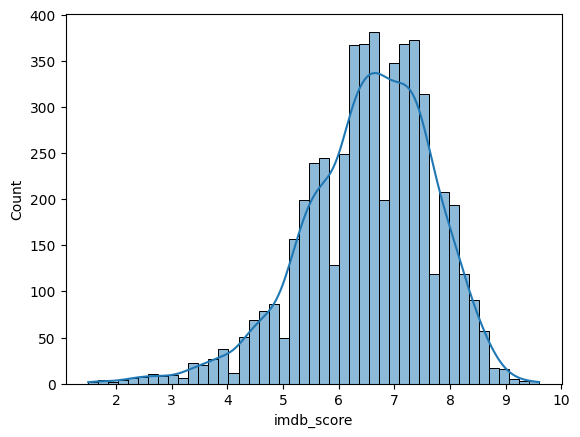

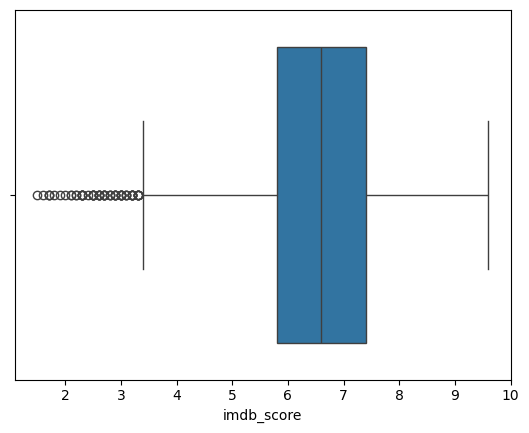

In [32]:
sns.histplot(data=data,x='imdb_score',kde=True)
plt.show()
sns.boxplot(data=data,x='imdb_score')
plt.show()

In [33]:
bins = [-float('inf'), 4, 5, 7, 9, float('inf')]
labels = ['Less than 4', '4-5', '5-7', '7-9', 'Greater than 9']

data_bins['imdb_score_bins'] = pd.cut(data_bins['imdb_score'], bins=bins, labels=labels, right=False)

In [34]:
data_bins['imdb_score_bins'].value_counts()

5-7               2757
7-9               2043
4-5                313
Less than 4        149
Greater than 9      21
Name: imdb_score_bins, dtype: int64

In [35]:
data[data['imdb_score'] < 2]

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
1101,1101,tm171891,Himmatwala,MOVIE,When a temple priest commits suicide after bei...,2013,NaN,150,tt2802286,1.700,8550.000
1556,1556,tm232930,Kyaa Kool Hain Hum 3,MOVIE,In order to impress his girlfriend's conservat...,2016,NaN,124,tt5290620,1.900,4341.000
1664,1664,tm549892,Aerials,MOVIE,Earth is invaded by Aliens from outer space. A...,2016,NaN,90,tt5314138,1.500,382.000
3355,3355,tm839411,Me Against You: Mr. S's Vendetta,MOVIE,A young couple who makes popular YouTube video...,2020,NaN,64,tt11559652,1.700,362.000
4648,4648,ts319303,He's Expecting,SHOW,When a successful ad executive who's got it al...,2022,TV-PG,26,tt14719276,1.600,2735.000
4782,4782,ts280693,Thomas & Friends: All Engines Go!,SHOW,"In a reboot of the classic TV series, a younge...",2021,TV-Y,11,tt14556544,1.700,509.000
5035,5035,ts287941,Racket Boys,SHOW,A story of a boys' badminton team at a middle ...,2021,TV-14,70,tt14482414,1.800,27484.000


In [36]:
data_bins[data_bins['imdb_score_bins'] == 'Greater than 9']

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes,release_year_bins,imdb_score_bins
24,24,tm76557,No Longer Kids,MOVIE,"By coincidence, Ahmad discovers that his fathe...",1979,NaN,235,tt8312792,9.000,943.000,Less than 2000,Greater than 9
194,194,ts28516,Okupas,SHOW,"During the year 2000, Ricardo, Pollo, Walter a...",2000,TV-MA,40,tt0289649,9.000,2326.000,2000-2010,Greater than 9
229,229,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,tt0903747,9.500,1727694.000,2000-2010,Greater than 9
245,245,ts3371,Avatar: The Last Airbender,SHOW,"In a war-torn world of elemental magic, a youn...",2005,TV-Y7,24,tt0417299,9.300,297336.000,2000-2010,Greater than 9
256,256,ts11313,DEATH NOTE,SHOW,Light Yagami is an ace student with great pros...,2006,TV-14,24,tt0877057,9.000,302147.000,2000-2010,Greater than 9
622,622,ts160526,Khawatir,SHOW,A TV show devoted to help young people to be m...,2005,TV-14,20,tt3062514,9.600,3046.000,2000-2010,Greater than 9
673,673,ts32835,Hunter x Hunter,SHOW,Twelve-year-old Gon Freecss one day discovers ...,2011,TV-14,23,tt2098220,9.000,87857.000,2010-2020,Greater than 9
822,822,tm166740,Chhota Bheem & Krishna in Mayanagari,MOVIE,Bheem and his Friends are having a great time ...,2011,G,66,tt16235600,9.000,5.000,2010-2020,Greater than 9
860,860,ts20682,Attack on Titan,SHOW,"Several hundred years ago, humans were nearly ...",2013,TV-MA,24,tt2560140,9.000,325381.000,2010-2020,Greater than 9
1033,1033,ts121189,"Raja, Rasoi Aur Anya Kahaniyaan",SHOW,Explore the history and flavors of regional In...,2014,NaN,29,tt6953924,9.000,327.000,2010-2020,Greater than 9


In [37]:
#Top 5 movies with highest imdbscore
data.nlargest(5, 'imdb_score')

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
622,622,ts160526,Khawatir,SHOW,A TV show devoted to help young people to be m...,2005,TV-14,20,tt3062514,9.600,3046.000
2787,2787,ts265844,#ABtalks,SHOW,#ABtalks is a YouTube interview show hosted by...,2018,TV-PG,68,tt12635254,9.600,7.000
229,229,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,tt0903747,9.500,1727694.000
245,245,ts3371,Avatar: The Last Airbender,SHOW,"In a war-torn world of elemental magic, a youn...",2005,TV-Y7,24,tt0417299,9.300,297336.000
3144,3144,ts85398,Our Planet,SHOW,Experience our planet's natural beauty and exa...,2019,TV-G,50,tt9253866,9.300,41386.000


In [38]:
#Bottom 5 movies with the lowest IMDb scores
data.nsmallest(5, 'imdb_score')

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
1664,1664,tm549892,Aerials,MOVIE,Earth is invaded by Aliens from outer space. A...,2016,NaN,90,tt5314138,1.500,382.000
4648,4648,ts319303,He's Expecting,SHOW,When a successful ad executive who's got it al...,2022,TV-PG,26,tt14719276,1.600,2735.000
1101,1101,tm171891,Himmatwala,MOVIE,When a temple priest commits suicide after bei...,2013,NaN,150,tt2802286,1.700,8550.000
3355,3355,tm839411,Me Against You: Mr. S's Vendetta,MOVIE,A young couple who makes popular YouTube video...,2020,NaN,64,tt11559652,1.700,362.000
4782,4782,ts280693,Thomas & Friends: All Engines Go!,SHOW,"In a reboot of the classic TV series, a younge...",2021,TV-Y,11,tt14556544,1.700,509.000


* Aerials has the lowest imdb score and Khawatir, #ABtalks have the highest score of 9.6

* Netflix's content enjoys a predominantly moderate rating, with a substantial portion receiving high scores (7-9). Some titles have lower ratings (less than 4), indicating varied viewer reception. The mix of ratings, including a smaller segment with exceptionally high scores (greater than 9), suggests a diverse content library catering to different audience preferences.

###Analysis on Imdb votes

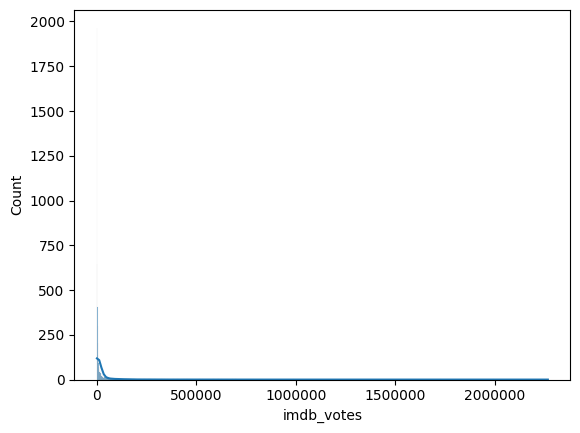

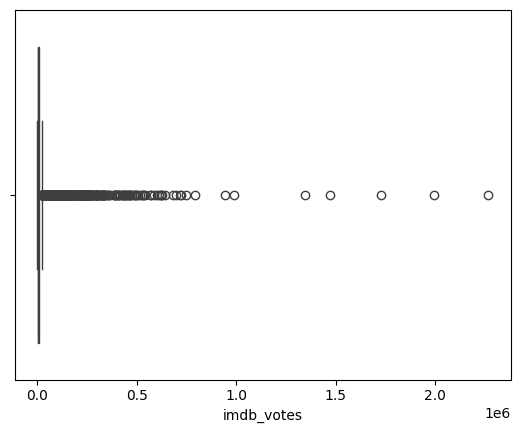

In [39]:
from matplotlib.ticker import ScalarFormatter
sns.histplot(data=data,x='imdb_votes',kde=True)
#plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='x')
plt.show()
sns.boxplot(data=data,x='imdb_votes')
plt.show()

<Axes: xlabel='imdb_votes'>

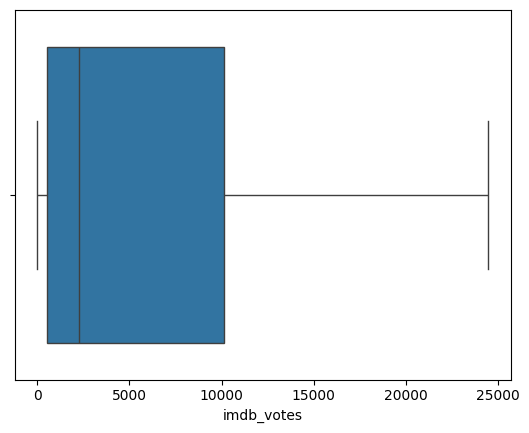

In [40]:
sns.boxplot(x=data['imdb_votes'], showfliers=False)

In [41]:
data[data['imdb_votes'] > 500000]

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.300,795222.000
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.200,530877.000
48,48,tm22327,Full Metal Jacket,MOVIE,A pragmatic U.S. Marine observes the dehumaniz...,1987,R,116,tt0093058,8.300,723306.000
101,101,tm122434,Forrest Gump,MOVIE,A man with a low IQ has accomplished great thi...,1994,PG-13,142,tt0109830,8.800,1994599.000
104,104,tm57554,Saving Private Ryan,MOVIE,"As U.S. troops storm the beaches of Normandy, ...",1998,R,169,tt0120815,8.600,1346020.000
229,229,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,tt0903747,9.500,1727694.000
230,230,ts9,The Walking Dead,SHOW,Sheriff's deputy Rick Grimes awakens from a co...,2010,TV-MA,46,tt1520211,8.200,945125.000
246,246,tm92641,Inception,MOVIE,"Cobb, a skilled thief who commits corporate es...",2010,PG-13,148,tt1375666,8.800,2268288.000
248,248,tm87484,How to Train Your Dragon,MOVIE,As the son of a Viking leader on the cusp of m...,2010,PG,98,tt0892769,8.100,719717.000
250,250,tm39030,Casino Royale,MOVIE,"Le Chiffre, a banker to the world's terrorists...",2006,NaN,139,tt0381061,8.000,644336.000


In [42]:
#Top 5 movies with highest imdbvotes
data.nlargest(5, 'imdb_votes')

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
246,246,tm92641,Inception,MOVIE,"Cobb, a skilled thief who commits corporate es...",2010,PG-13,148,tt1375666,8.800,2268288.000
101,101,tm122434,Forrest Gump,MOVIE,A man with a low IQ has accomplished great thi...,1994,PG-13,142,tt0109830,8.800,1994599.000
229,229,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,tt0903747,9.500,1727694.000
662,662,tm41792,Django Unchained,MOVIE,"With the help of a German bounty hunter, a fre...",2012,R,165,tt1853728,8.400,1472668.000
104,104,tm57554,Saving Private Ryan,MOVIE,"As U.S. troops storm the beaches of Normandy, ...",1998,R,169,tt0120815,8.600,1346020.000


In [43]:
#Bottom 5 movies with the lowest IMDb scores
data.nsmallest(5, 'imdb_votes')

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
822,822,tm166740,Chhota Bheem & Krishna in Mayanagari,MOVIE,Bheem and his Friends are having a great time ...,2011,G,66,tt16235600,9.000,5.000
2752,2752,tm407349,The Birth Reborn 2,MOVIE,NaN,2018,PG,91,tt16114198,6.600,5.000
4110,4110,tm835414,Sitara,MOVIE,A Bangaldeshi housewife crosses the border to ...,2019,NaN,128,tt7654668,8.000,5.000
5186,5186,ts288861,Let's Eat,SHOW,A food-blogging insurance agent encounters a f...,2021,TV-14,60,tt15978704,8.200,5.000
91,91,ts63001,High Risk,SHOW,High Risk is a program aired by the CBS televi...,1988,TV-PG,50,tt0094478,3.800,6.000


* Inception is the most voted movie and The Birth Reborn 2 has the least votes with a low imdb score
* The IMDb votes boxplot for Netflix movies and shows reveals a concentrated distribution, with the majority receiving votes within a specific range. Outliers, notably around 28 titles with IMDb votes exceeding 500,000, represent exceptional cases of widespread acclaim.

* The boxplot's central tendency, highlighted by the median line, provides insights into typical voting behavior, while the whiskers' length indicates variability. Genuine high-vote titles influence the overall distribution, showcasing the impact of particularly popular or critically acclaimed content on the platform. This visualization aids in understanding the diverse landscape of viewer engagement with Netflix content.

##Bivariate Analysis

###IMDb Scores vs. Release Year:

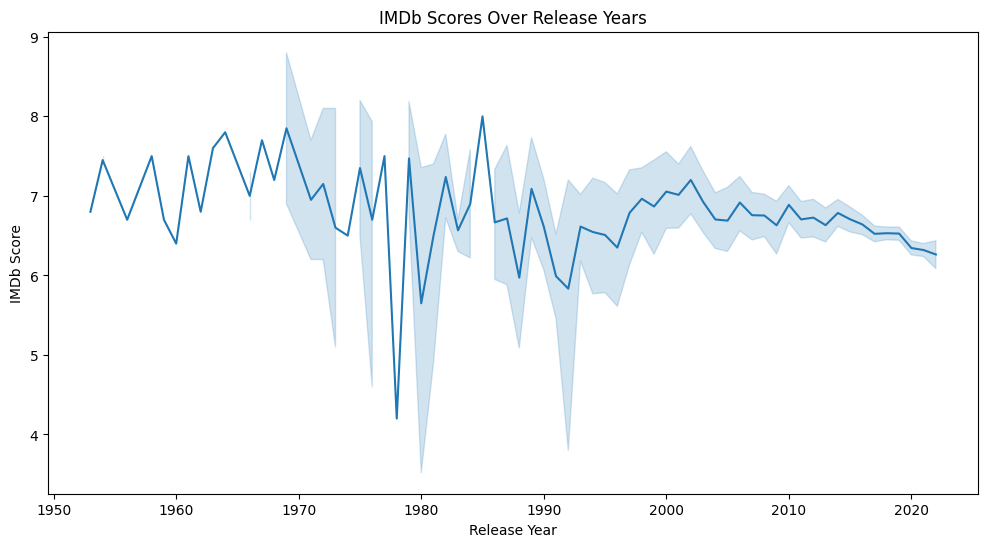

In [44]:
# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='release_year', y='imdb_score')

# Set labels and title
plt.xlabel('Release Year')
plt.ylabel('IMDb Score')
plt.title('IMDb Scores Over Release Years')

# Show the plot
plt.show()

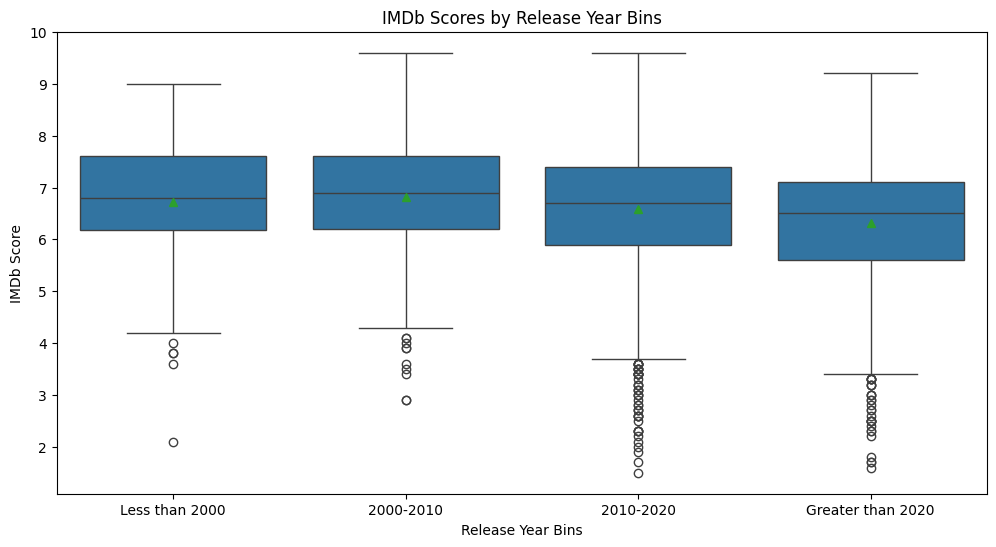

In [45]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_bins, x='release_year_bins', y='imdb_score', showmeans=True)

# Set labels and title
plt.xlabel('Release Year Bins')
plt.ylabel('IMDb Score')
plt.title('IMDb Scores by Release Year Bins')

# Show the plot
plt.show()

In [46]:
# Group by release year bins and calculate min, max, and avg IMDb scores
summary_stats = data_bins.groupby('release_year_bins')['imdb_score'].agg(['min', 'max', 'mean']).reset_index()

# Display the summary statistics
print(summary_stats)

   release_year_bins   min   max  mean
0     Less than 2000 2.100 9.000 6.727
1          2000-2010 2.900 9.600 6.810
2          2010-2020 1.500 9.600 6.589
3  Greater than 2020 1.600 9.200 6.323



In the 2010-2020 release year bin, there are numerous left-side outliers. The mean IMDb score distribution across different release year bins follows the order: 2000-2010 > less than 2000 > 2010-2020 > greater than 2020. Analyzing the data in the greater than 2020 bin, which encompasses only 2 years of data, reveals movies with IMDb scores ranging from 1.6 to 9.2. Notably, both the 2000-2010 and 2010-2020 bins share a maximum IMDb score of 9.6. Additionally, the 2010-2020 bin contains the movie with the lowest IMDb rating among the analyzed release year bins.

###IMDb Scores vs. Type (Movie/TV Show):

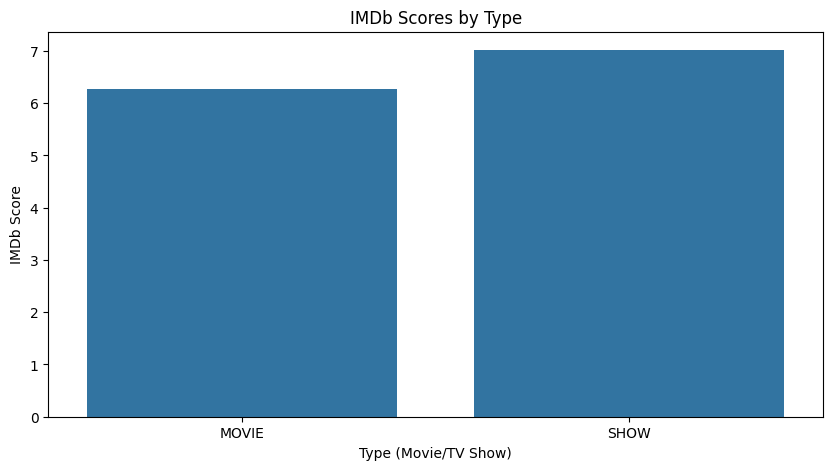

In [47]:
# Create a bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x='type', y='imdb_score', errorbar=None)

# Set labels and title
plt.xlabel('Type (Movie/TV Show)')
plt.ylabel('IMDb Score')
plt.title('IMDb Scores by Type')

# Show the plot
plt.show()

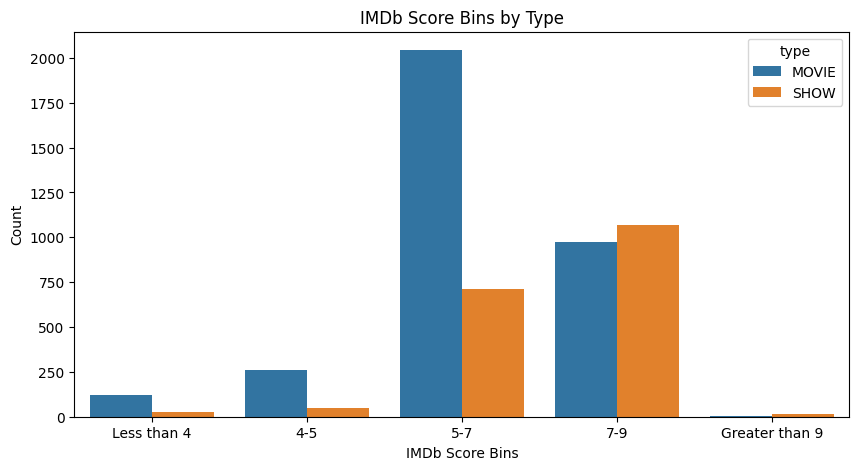

In [48]:
# Create a bar plot
plt.figure(figsize=(10, 5))
sns.countplot(data=data_bins, x='imdb_score_bins', hue='type')

# Set labels and title
plt.xlabel('IMDb Score Bins')
plt.ylabel('Count')
plt.title('IMDb Score Bins by Type')

# Show the plot
plt.show()

In general, it is evident that TV shows tend to have higher IMDb scores compared to movies. Upon closer examination, a larger proportion of movies fall within the 5-7 IMDb score range, while TV shows exhibit a higher prevalence in the 7-9 score range. Furthermore, the category of IMDb scores greater than 9 shows a slightly higher representation of TV shows than movies. Conversely, movies are more prevalent in the less than 4 and 4-5 IMDb score categories.







###IMDb Scores vs. Age Certification:

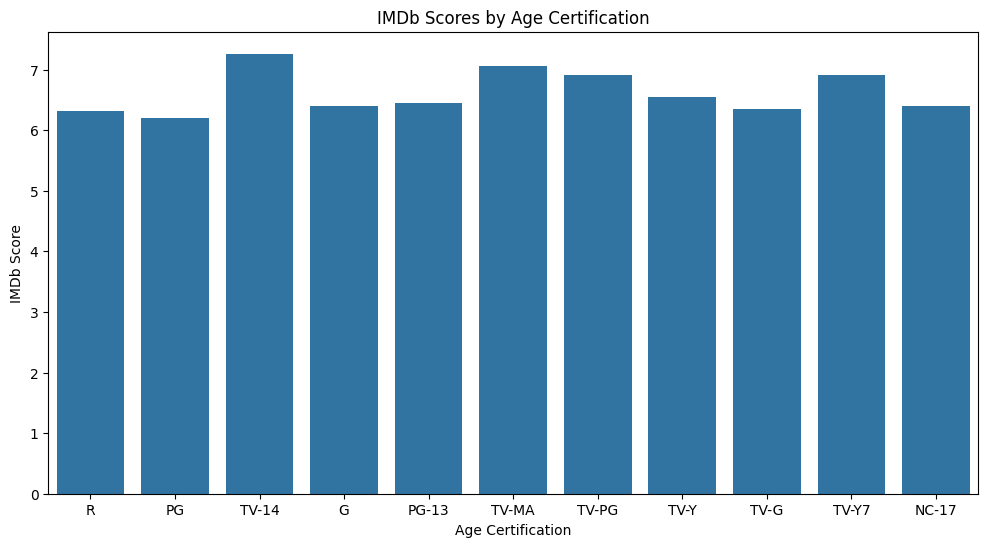

In [49]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='age_certification', y='imdb_score', errorbar=None)

# Set labels and title
plt.xlabel('Age Certification')
plt.ylabel('IMDb Score')
plt.title('IMDb Scores by Age Certification')

# Show the plot
plt.show()

In [50]:
data.groupby('age_certification')['imdb_score'].mean().sort_values(ascending=False)

age_certification
TV-14   7.263
TV-MA   7.066
TV-PG   6.917
TV-Y7   6.913
TV-Y    6.548
PG-13   6.445
NC-17   6.400
G       6.393
TV-G    6.349
R       6.321
PG      6.208
Name: imdb_score, dtype: float64

 The mean IMDb scores for various age certification categories reveal that TV-14 holds the highest average viewer rating with a score of 7.263, closely followed by TV-MA at 7.066. TV-PG, TV-Y7, and TV-Y also exhibit strong mean scores at 6.917, 6.913, and 6.548, respectively.

 The broader list includes additional categories such as PG-13, NC-17, G, TV-G, R, and PG, each with its own distinct mean IMDb score. These ratings provide valuable insights into the perceived viewer satisfaction across different age certification classifications on Netflix.

###IMDb Scores vs. Runtime:

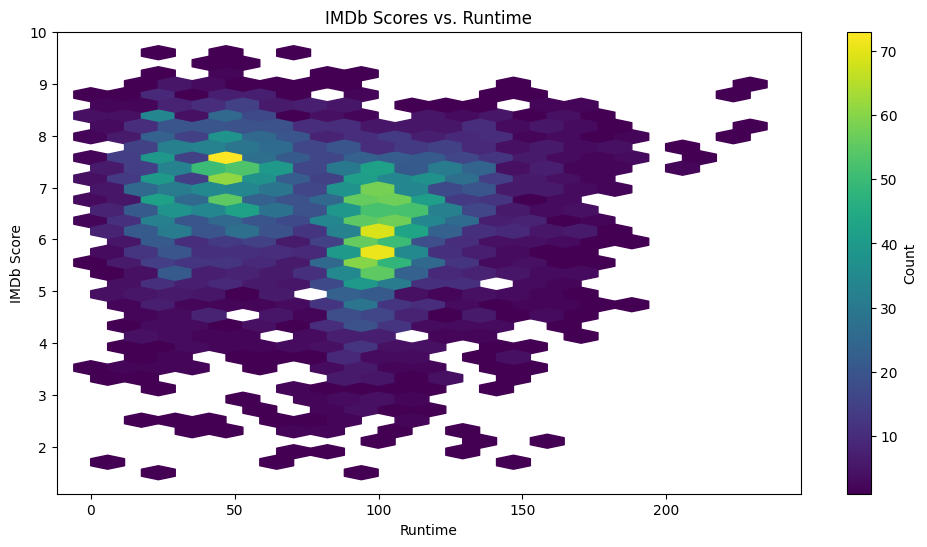

In [51]:
# Create a 2D histogram or hexbin plot
plt.figure(figsize=(12, 6))
plt.hexbin(data['runtime'], data['imdb_score'], gridsize=(20, 20), cmap='viridis', mincnt=1)

# Set labels and title
plt.xlabel('Runtime')
plt.ylabel('IMDb Score')
plt.title('IMDb Scores vs. Runtime')

# Show the colorbar
plt.colorbar(label='Count')

# Show the plot
plt.show()

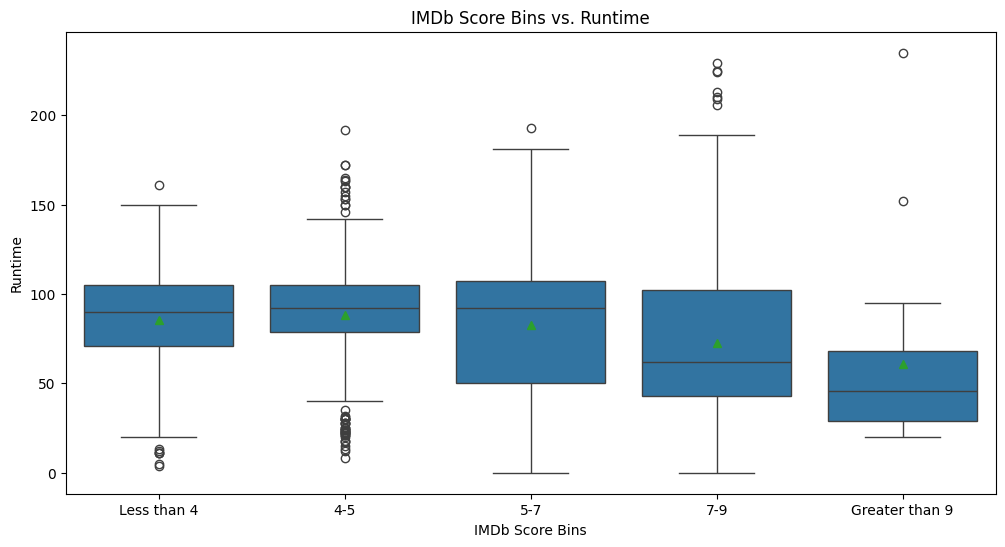

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_bins, x='imdb_score_bins', y='runtime',showmeans=True)

# Set labels and title
plt.xlabel('IMDb Score Bins')
plt.ylabel('Runtime')
plt.title('IMDb Score Bins vs. Runtime')

# Show the plot
plt.show()

In [53]:
data_bins.groupby('imdb_score_bins')['runtime'].agg(['min', 'max', 'mean'])

,min,max,mean
imdb_score_bins,,,
Less than 4,4,161,85.490
4-5,8,192,88.441
5-7,0,193,82.927
7-9,0,229,72.481
Greater than 9,20,235,61.095


From the hexbin plot, we can say that there are two highs- one around 50 minutes and 100 minutes approximately indicating that 50's could be shows episodes and 100s is the movies.

The IMDb score bins reveal interesting insights into the distribution of runtimes, accompanied by the presence of outliers:

- **Less than 4:** The runtime ranges from 4 to 161 minutes, with an average of 85.49 minutes. There are outliers in this bin, indicating that some titles with lower IMDb scores have notably longer runtimes.

- **4-5:** In this bin, runtimes span from 8 to 192 minutes, with an average of 88.44 minutes. Similar to the previous bin, outliers suggest that certain titles with IMDb scores in this range have extended durations and also very short durations.

- **5-7:** The runtime distribution varies from 0 to 193 minutes, averaging at 82.93 minutes. Notably, there are outliers, indicating that specific titles with IMDb scores between 5 and 7 deviate from the typical runtime.

- **7-9:** Runtimes in this bin range from 0 to 229 minutes, with an average of 72.48 minutes. Outliers in this category suggest that certain titles with higher IMDb scores have relatively longer durations.

- **Greater than 9:** The runtime distribution spans from 20 to 235 minutes, with an average of 61.10 minutes. Most of the data lie within 100 minutes.

###IMDb Scores vs. IMDb Votes:

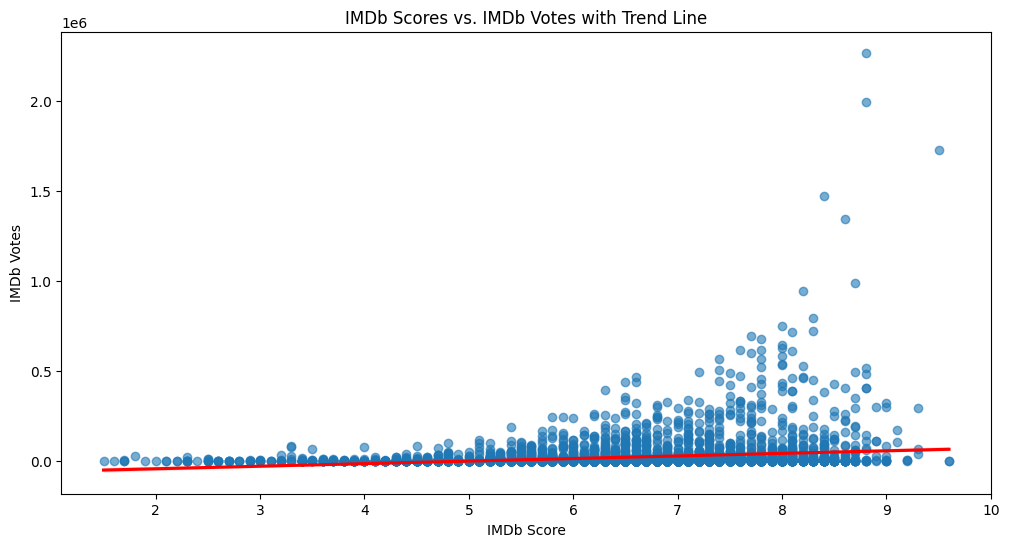

In [54]:
plt.figure(figsize=(12, 6))
sns.regplot(data=data, x='imdb_score', y='imdb_votes', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# Set labels and title
plt.xlabel('IMDb Score')
plt.ylabel('IMDb Votes')
plt.title('IMDb Scores vs. IMDb Votes with Trend Line')

# Show the plot
plt.show()

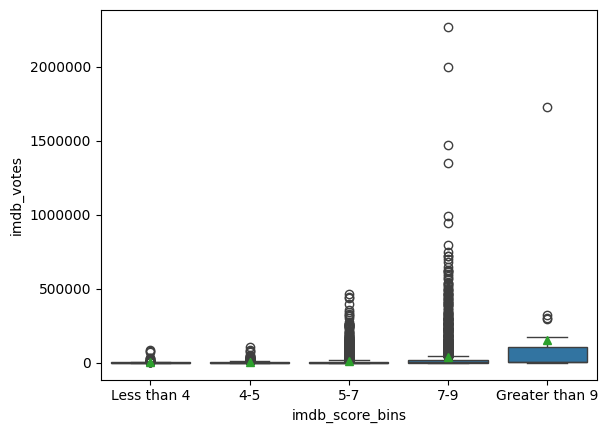

In [55]:
sns.boxplot(data=data_bins, x='imdb_score_bins', y='imdb_votes', showmeans=True)
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

<Axes: xlabel='imdb_score_bins', ylabel='imdb_votes'>

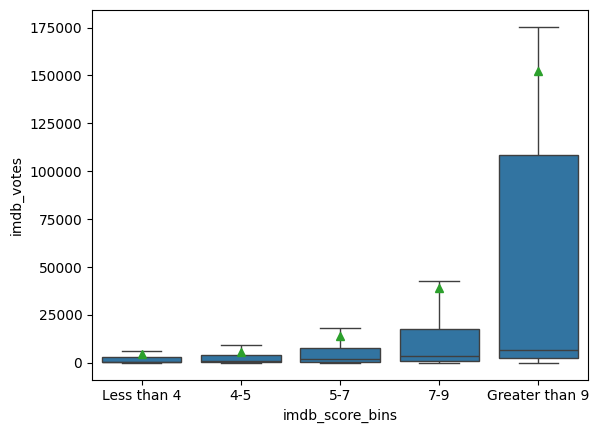

In [56]:
sns.boxplot( data=data_bins, x='imdb_score_bins', y='imdb_votes', showmeans=True, showfliers=False)

In [57]:
data_bins.groupby('imdb_score_bins')['imdb_votes'].agg(['min', 'max', 'mean'])

,min,max,mean
imdb_score_bins,,,
Less than 4,6.000,83727.000,4488.906
4-5,7.000,103459.000,5453.567
5-7,5.000,465995.000,14049.166
7-9,5.000,2268288.000,38838.209
Greater than 9,5.000,1727694.000,152133.095



As IMDb scores rise, there is a corresponding increase in the average number of votes received. The trend demonstrates a gradual climb, starting at 4488.906 votes for scores less than 4 and reaching 152133.095 votes for scores greater than 9.

###Release Year vs. Type (Movie/TV Show):

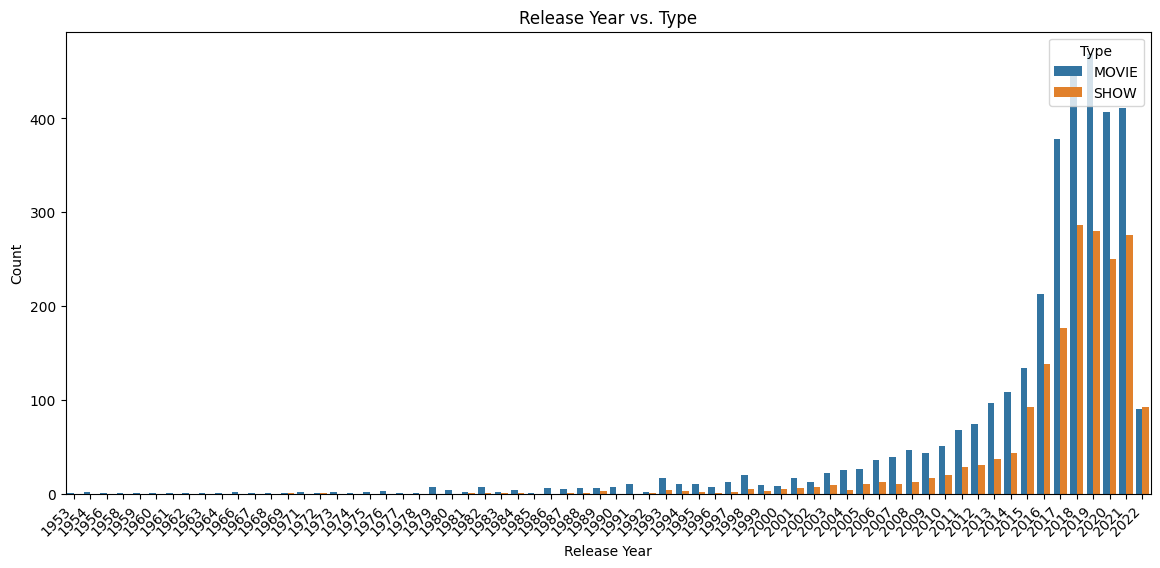

In [58]:
plt.figure(figsize=(14, 6))
sns.countplot(data=data, x='release_year', hue='type')

# Set labels and title
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Release Year vs. Type')

# Show the legend
plt.legend(title='Type', loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

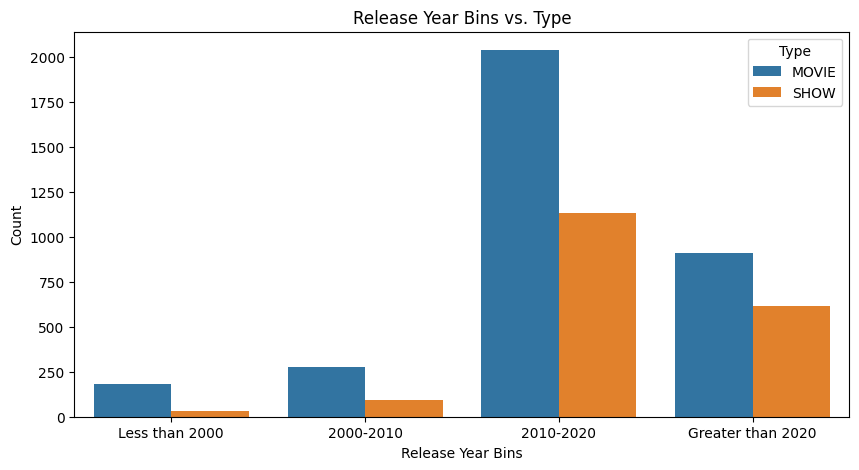

In [59]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data_bins, x='release_year_bins', hue='type')

# Set labels and title
plt.xlabel('Release Year Bins')
plt.ylabel('Count')
plt.title('Release Year Bins vs. Type')

# Show the legend
plt.legend(title='Type', loc='upper right')

# Show the plot
plt.show()

In [60]:
data_bins.groupby('release_year_bins')['type'].value_counts()

release_year_bins  type 
Less than 2000     MOVIE     184
                   SHOW       32
2000-2010          MOVIE     276
                   SHOW       93
2010-2020          MOVIE    2039
                   SHOW     1133
Greater than 2020  MOVIE     908
                   SHOW      618
Name: type, dtype: int64

The data reveals a gradual increase in the number of shows over the specified years. Notably, in the 2010-2020 category, the count of movies is twice the number of aired shows, suggesting a significant prevalence of movies during that period compared to TV shows.

###Release Year vs. Age Certification:

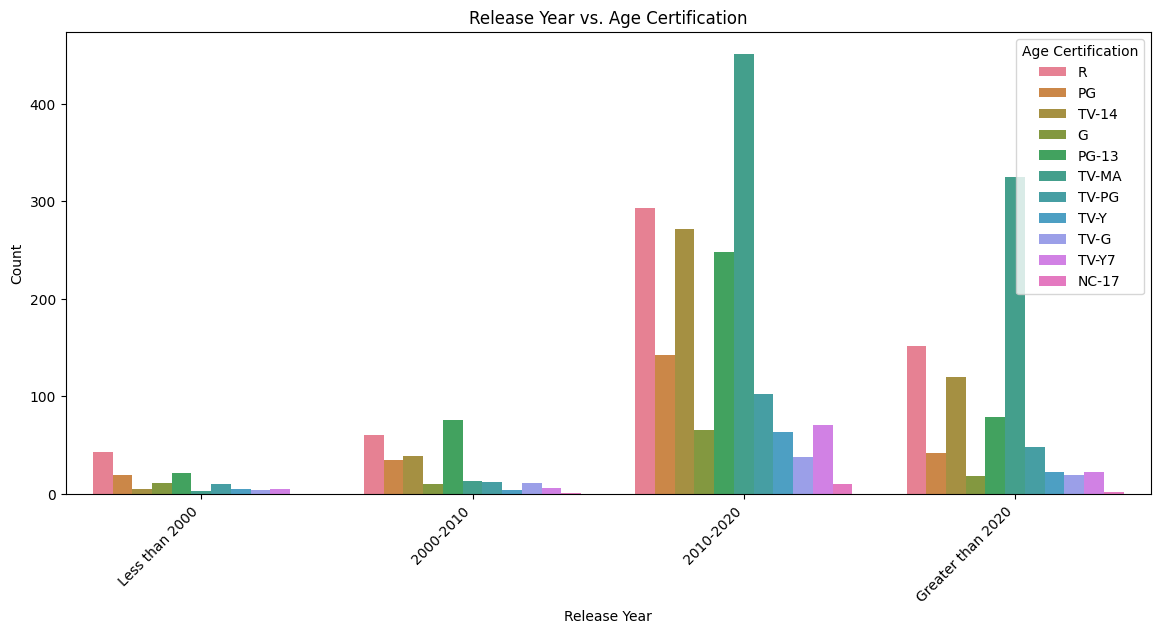

In [61]:
plt.figure(figsize=(14, 6))
sns.countplot(data=data_bins, x='release_year_bins', hue='age_certification')
# Set labels and title
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Release Year vs. Age Certification')

# Show the legend
plt.legend(title='Age Certification', loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

R rated movies have been constantly increasing with the general trend, where as the TV-MA there is a spike in 2010-2020 and in greater than 2020.

###Age Certification vs. Runtime:

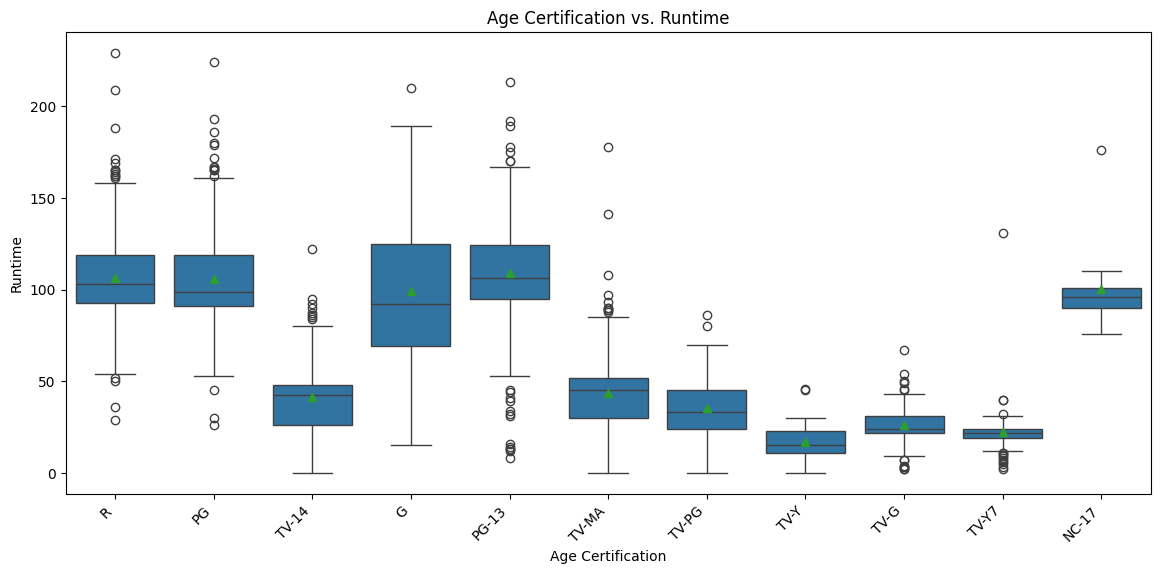

In [71]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='age_certification', y='runtime',showmeans=True)

# Set labels and title
plt.xlabel('Age Certification')
plt.ylabel('Runtime')
plt.title('Age Certification vs. Runtime')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


Movies with R and PG certifications tend to have longer runtimes in comparison. In the TV category, the average runtime is approximately 50 minutes, while for movies, the average runtime is around 110 minutes.

###Age Certification vs. IMDb Votes:

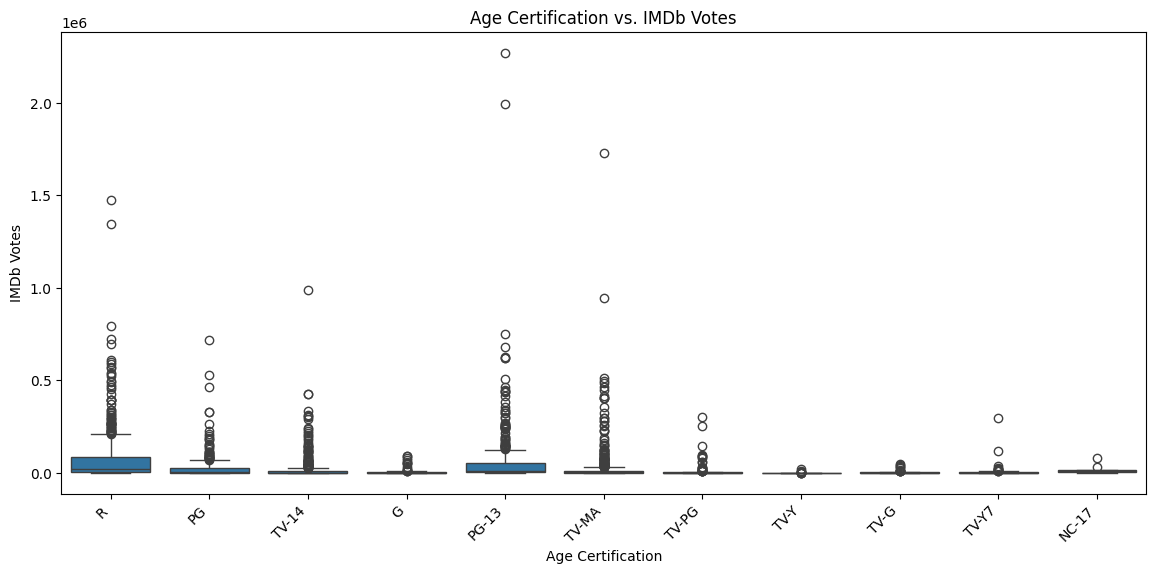

In [65]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='age_certification', y='imdb_votes')

# Set labels and title
plt.xlabel('Age Certification')
plt.ylabel('IMDb Votes')
plt.title('Age Certification vs. IMDb Votes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

PG-13 certified content exhibits a broader range of IMDb votes, while TV-Y content shows minimal variance in the number of votes.

###IMDb Scores by Type and Release Year:

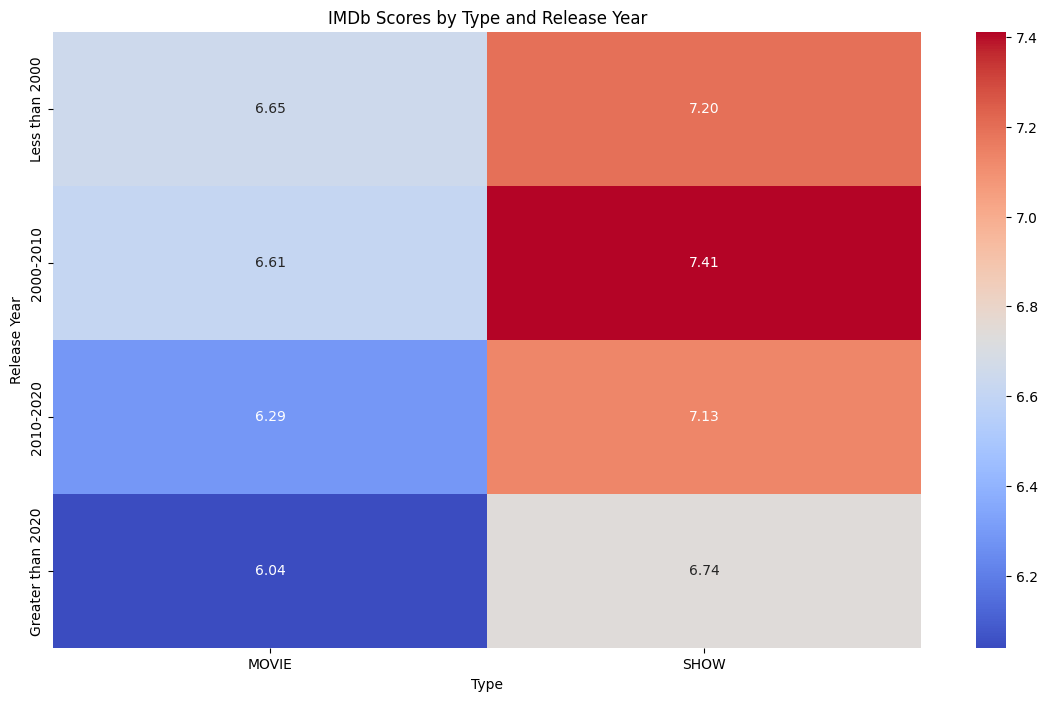

In [75]:
plt.figure(figsize=(14, 8))
sns.heatmap(data_bins.pivot_table(index='release_year_bins', columns='type', values='imdb_score', aggfunc='mean'), cmap='coolwarm', annot=True, fmt=".2f")

# Set labels and title
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.title('IMDb Scores by Type and Release Year')

# Show the plot
plt.show()

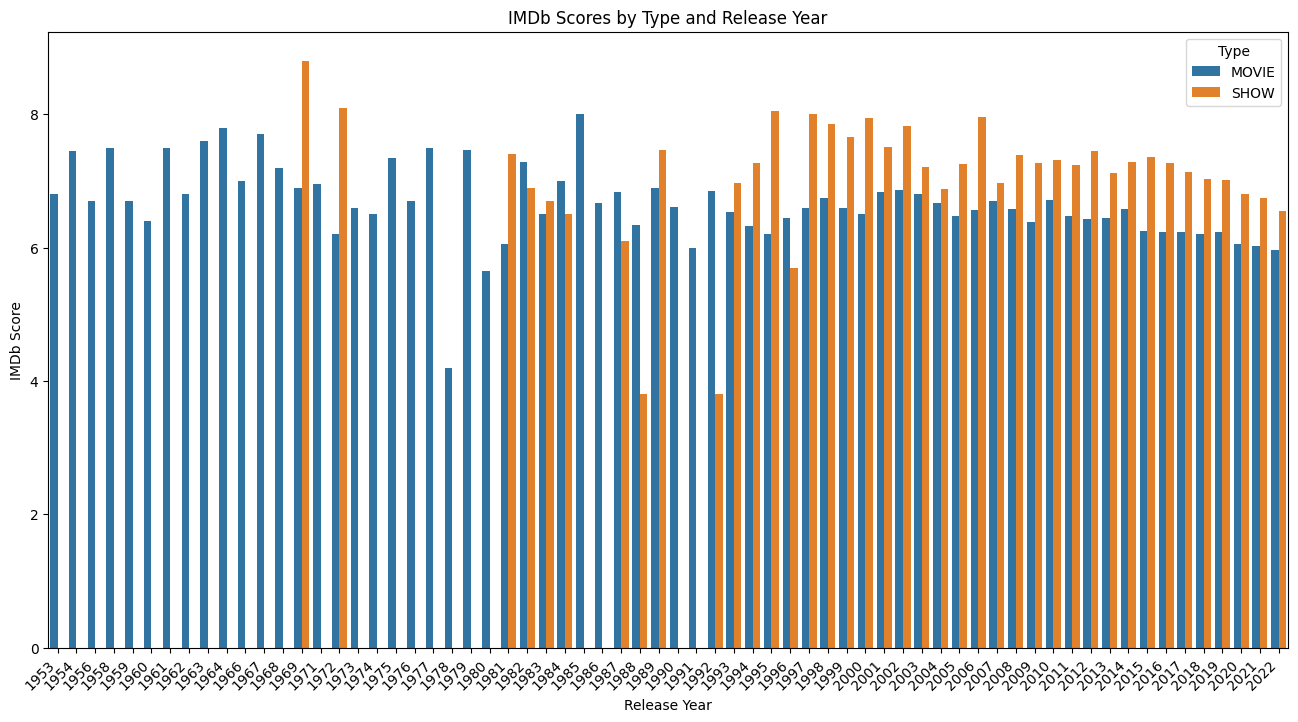

In [80]:
# Create a grouped bar plot
plt.figure(figsize=(16, 8))
sns.barplot(data=data, x='release_year', y='imdb_score', hue='type', errorbar=None)

# Set labels and title
plt.xlabel('Release Year')
plt.ylabel('IMDb Score')
plt.title('IMDb Scores by Type and Release Year')

# Show the legend
plt.legend(title='Type', loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

The bar plot indicates a scarcity of shows before 2000, with a noticeable increase afterward. In the 2000-2010 period, the average rating score for shows reaches 7.41. Across all years, movies maintain a relatively stable average IMDb score around 6.5, while TV shows exhibit a range from 6.5 to 7.

###IMDb Scores by Type, Release Year, and Age Certification:

<Figure size 1600x800 with 0 Axes>

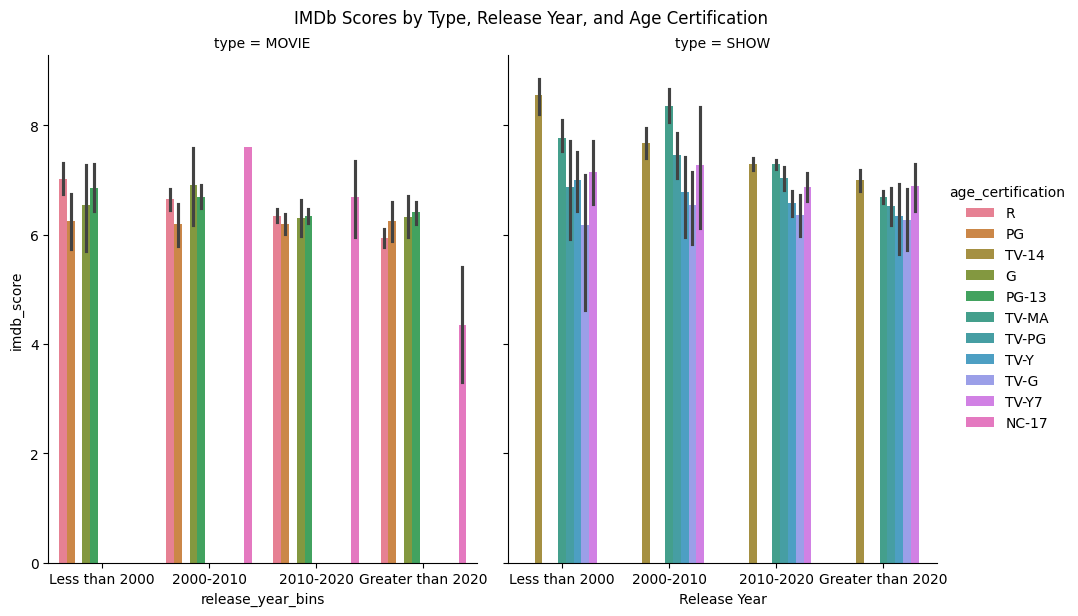

In [94]:
plt.figure(figsize=(16, 8))
sns.catplot(data=data_bins, x='release_year_bins', y='imdb_score', hue='age_certification', col='type', kind='bar', height=6, aspect=0.8)

# Set labels and title
plt.xlabel('Release Year')
plt.ylabel('IMDb Score')
plt.suptitle('IMDb Scores by Type, Release Year, and Age Certification', y=1.02)

# Show the plot
plt.show()

In [92]:
print(data_bins.groupby(['release_year_bins', 'type', 'age_certification'])['imdb_score'].mean().dropna())

release_year_bins  type   age_certification
Less than 2000     MOVIE  G                   6.536
                          PG                  6.253
                          PG-13               6.857
                          R                   7.023
                   SHOW   TV-14               8.560
                          TV-G                6.175
                          TV-MA               7.767
                          TV-PG               6.880
                          TV-Y                7.000
                          TV-Y7               7.140
2000-2010          MOVIE  G                   6.910
                          NC-17               7.600
                          PG                  6.189
                          PG-13               6.691
                          R                   6.645
                   SHOW   TV-14               7.682
                          TV-G                6.545
                          TV-MA               8.362
                    

The IMDb scores for Netflix content vary across different release year bins, types (Movie/Show), and age certifications. Here are some key observations:

**Less than 2000:**
- For Movies (MOVIE) released before 2000, the highest average IMDb score is observed for age certification R (7.023).
- For Shows (SHOW) released before 2000, TV-14 has the highest average IMDb score (8.560).

**2000-2010:**
- For Movies released between 2000 and 2010, the highest average IMDb score is observed for age certification NC-17 (7.600).
- For Shows released between 2000 and 2010, TV-MA has the highest average IMDb score (8.362).

**2010-2020:**
- For Movies released between 2010 and 2020, the highest average IMDb score is observed for age certification PG (6.197).
- For Shows released between 2010 and 2020, TV-14 has the highest average IMDb score (7.298).

**Greater than 2020:**
- For Movies released after 2020, the highest average IMDb score is observed for age certification PG-13 (6.413).
- For Shows released after 2020, TV-14 has the highest average IMDb score (6.993).


###IMDb Scores by Type, Release Year, and Runtime:

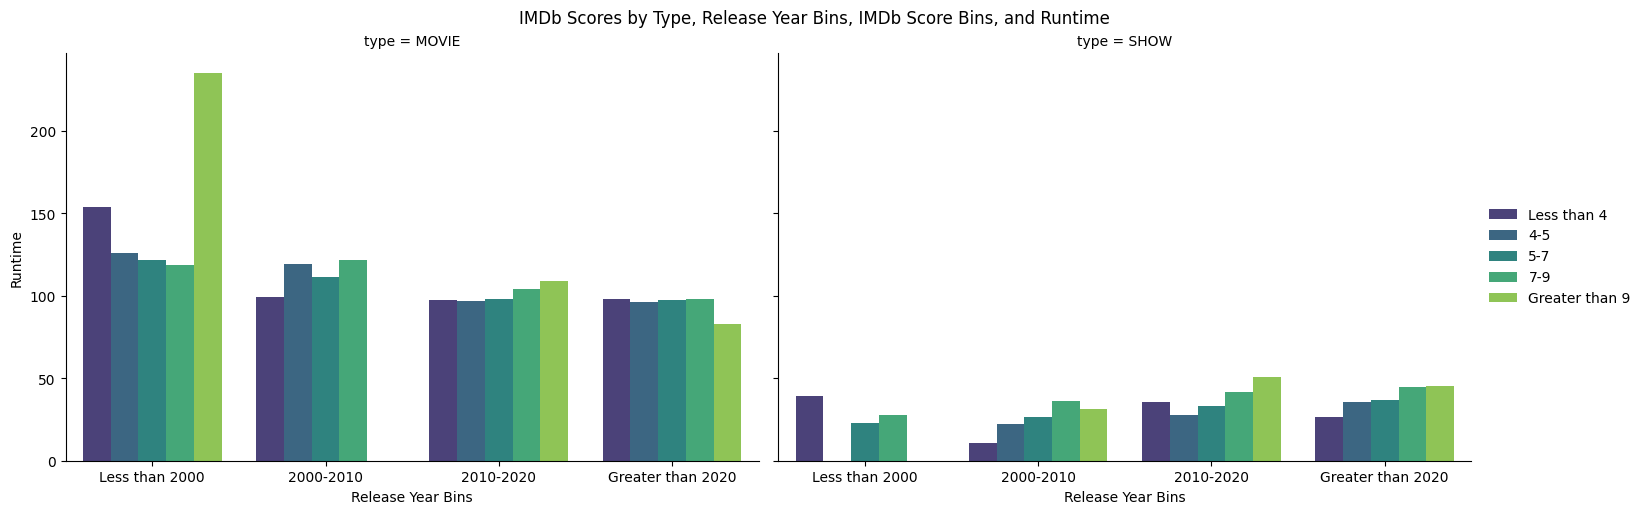

In [102]:
g = sns.FacetGrid(data_bins, col='type', height=5, aspect=1.5, col_wrap=2)
g.map_dataframe(sns.barplot, x='release_year_bins', y='runtime', hue='imdb_score_bins', errorbar=None, palette='viridis')

# Set labels and title
g.set_axis_labels('Release Year Bins', 'Runtime')
g.fig.suptitle('IMDb Scores by Type, Release Year Bins, IMDb Score Bins, and Runtime', y=1.02)

# Add legend
g.add_legend()

# Show the plot
plt.show()

In [103]:
print(data_bins.groupby(['release_year_bins', 'type', 'imdb_score_bins'])['runtime'].mean().dropna())

release_year_bins  type   imdb_score_bins
Less than 2000     MOVIE  Less than 4       154.000
                          4-5               126.118
                          5-7               121.625
                          7-9               118.289
                          Greater than 9    235.000
                   SHOW   Less than 4        39.000
                          5-7                22.700
                          7-9                27.850
2000-2010          MOVIE  Less than 4        99.000
                          4-5               119.417
                          5-7               111.326
                          7-9               121.509
                   SHOW   Less than 4        11.000
                          4-5                22.000
                          5-7                26.409
                          7-9                36.444
                          Greater than 9     31.200
2010-2020          MOVIE  Less than 4        97.532
                      

The analysis of IMDb scores by type, release year bins, and IMDb score bins reveals interesting patterns. In general, shows from the "Less than 2000" and "Greater than 2020" release year bins tend to have higher IMDb scores, with "Greater than 9" IMDb score bin having the highest average runtime. Movies in the "Less than 2000" and "Greater than 2020" bins show a similar trend, while those in the "2000-2010" and "2010-2020" bins have slightly lower IMDb scores. Shows from the "2000-2010" and "2010-2020" bins show an increasing trend in average runtime as IMDb scores increase. Overall, the analysis provides insights into the relationship between IMDb scores, release years, and average runtimes for both movies and shows on Netflix.

###IMDb Scores by Type, Age Certification, and IMDb Votes:

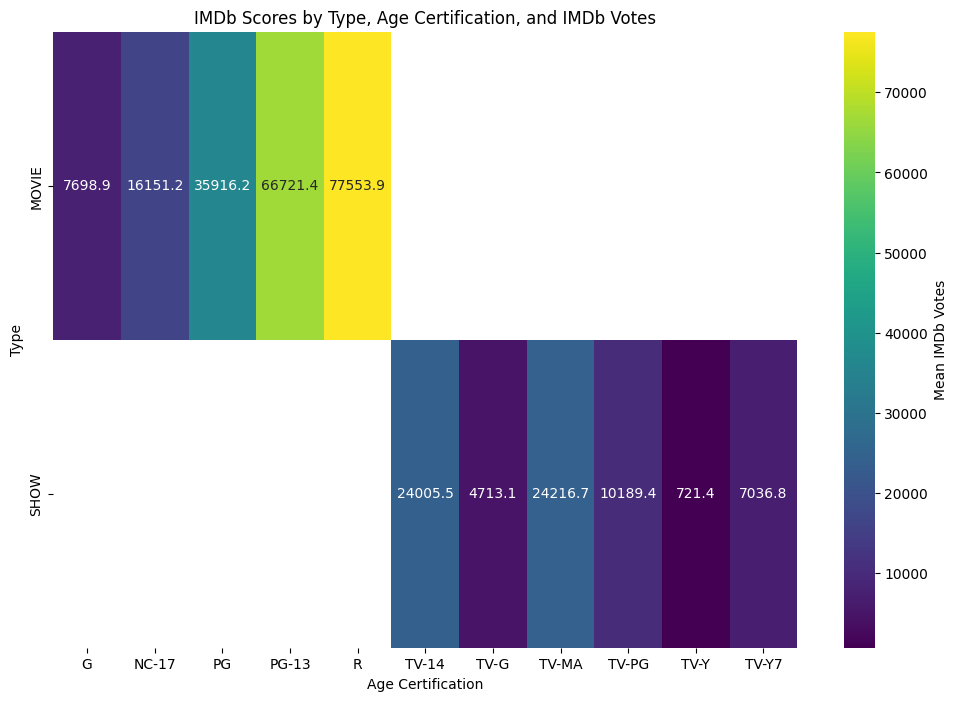

In [104]:
filtered_data = data.dropna(subset=['imdb_score', 'type', 'age_certification', 'imdb_votes'])

# Create a heatmap
plt.figure(figsize=(12, 8))
heatmap_data = filtered_data.pivot_table(index='type', columns=['age_certification'], values='imdb_votes', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", cbar_kws={'label': 'Mean IMDb Votes'})

# Set labels and title
plt.xlabel('Age Certification')
plt.ylabel('Type')
plt.title('IMDb Scores by Type, Age Certification, and IMDb Votes')

# Show the plot
plt.show()

In [105]:
print(data_bins.groupby(['age_certification', 'type'])['imdb_votes'].mean().dropna())

age_certification  type 
G                  MOVIE    7698.905
NC-17              MOVIE   16151.154
PG                 MOVIE   35916.211
PG-13              MOVIE   66721.416
R                  MOVIE   77553.875
TV-14              SHOW    24005.456
TV-G               SHOW     4713.056
TV-MA              SHOW    24216.662
TV-PG              SHOW    10189.407
TV-Y               SHOW      721.372
TV-Y7              SHOW     7036.827
Name: imdb_votes, dtype: float64


* For MOVIE type content, the highest average votes are observed for NC-17 certification (16,151.154), followed by R (77,553.875).
* Among MOVIE types, G certification has the lowest average votes (7,698.905).
* Among SHOW types, TV-MA certification receives the highest average votes (24,216.662), while TV-Y certification has the lowest (721.372).
* TV-14 shows receive substantial average votes (24,005.456), and TV-G shows have lower but notable average votes (4,713.056).
* PG-13 certified MOVIEs have the highest average votes (66,721.416) among all age certifications.

###Correlation Matrix:

<ipython-input-115-8a385178274f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


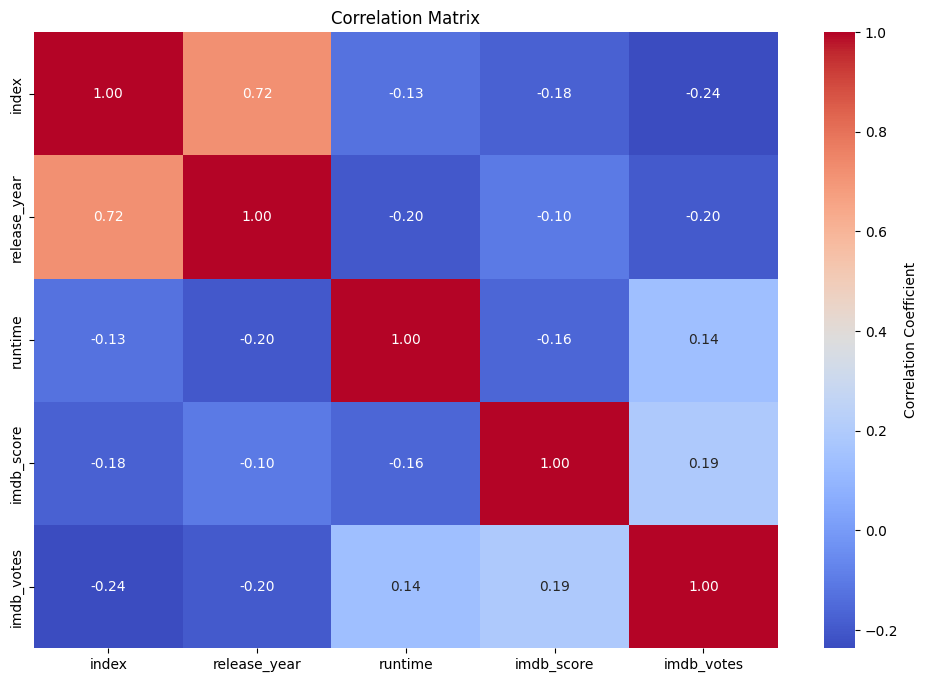

In [115]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})

# Set title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [116]:
correlation_matrix

,index,release_year,runtime,imdb_score,imdb_votes
index,1.000,0.716,-0.128,-0.177,-0.236
release_year,0.716,1.000,-0.201,-0.103,-0.197
runtime,-0.128,-0.201,1.000,-0.159,0.139
imdb_score,-0.177,-0.103,-0.159,1.000,0.190
imdb_votes,-0.236,-0.197,0.139,0.190,1.000


* IMDb Votes and IMDb Score: Weak positive correlation (0.190) shows higher IMDb scores associated with more votes.

* Runtime and IMDb Score: Weak negative correlation (-0.159) suggests a slight decrease in IMDb score with longer runtimes.

* Release Year and Runtime: Weak negative correlation (-0.201) implies a slight decrease in runtime as the release year increases.

##Handling Missing Values

In [125]:
df=data_bins.copy()

In [126]:
# Dropping the 'index' column
df.drop('index', inplace=True, axis=1)

In [127]:
df.isnull().sum()

id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
release_year_bins       0
imdb_score_bins         0
dtype: int64

In [128]:
# Display rows where 'description' is null in the DataFrame
df[df['description'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes,release_year_bins,imdb_score_bins
1117,tm681614,Grandmother's Farm,MOVIE,NaN,2013,NaN,71,tt10033686,2.900,74.000,2010-2020,Less than 4
2605,ts90941,"Heidi, bienvenida a casa",SHOW,NaN,2017,TV-Y,46,tt7183310,6.200,20.000,2010-2020,5-7
2752,tm407349,The Birth Reborn 2,MOVIE,NaN,2018,PG,91,tt16114198,6.600,5.000,2010-2020,5-7
4020,tm1172010,The Lockdown Plan,MOVIE,NaN,2020,NaN,49,tt13079112,6.500,NaN,Greater than 2020,5-7
4393,tm902993,Mama Drama,MOVIE,NaN,2020,NaN,85,tt12424356,6.300,8.000,Greater than 2020,5-7


Impute missing descriptions with an empty string to preserve data completeness and structure while indicating the absence of a description for those specific rows.

In [129]:
# For description
df['description'].fillna('', inplace=True)


 Replace NaN values in 'imdb_votes' with 0 to preserve data integrity, provide a numeric representation, avoid data type issues, and facilitate visualizations.

In [131]:
# Replace NaN values with 0 or another suitable value
df['imdb_votes'].fillna(0, inplace=True)

# Convert the float column to integer
df['imdb_votes'] = df['imdb_votes'].astype('int64')

In [133]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/DecoderBot/netflix.csv',index=False)

Given the business objective of preserving data, imputation is a suitable strategy. Filling missing values in the 'age certification' column with the mode (most frequent value) retains information and addresses missing values.

In [130]:
#For Age Certification:
df['age_certification'].fillna(df['age_certification'].mode()[0], inplace=True)


In [132]:
df.isnull().sum()

id                   0
title                0
type                 0
description          0
release_year         0
age_certification    0
runtime              0
imdb_id              0
imdb_score           0
imdb_votes           0
release_year_bins    0
imdb_score_bins      0
dtype: int64

##Data Insights

1. **Release Year Trends:**
   - Most of the shows and movies in the dataset were released in the years 2010-2020, followed by those released after 2020.
   - There is a noticeable increase in content from the 2000-2010 period.

2. **Viewer Preferences by Type:**
   - TV shows tend to have higher IMDb scores than movies on average.
   - Movies are more concentrated in the IMDb score range of 5-7, while TV shows are more prevalent in the 7-9 range.

3. **Age Certification Distribution:**
   - The majority of the content is rated as TV-MA, followed by TV-14 and TV-PG.
   - There are missing values in the age certification column for a significant portion of the data.

4. **Runtime Analysis:**
   - The runtime of shows and movies varies, with a concentration around 100 to 120 minutes.
   - There are outliers, particularly movies with runtimes exceeding 200 minutes.

5. **Viewer Engagement (IMDb Votes):**
   - IMDb votes exhibit a wide range, with some movies or shows receiving exceptionally high votes.
   - The presence of outliers with over 500,000 votes indicates widespread acclaim for certain titles.

6. **IMDb Score Distribution:**
   - The IMDb scores follow a roughly normal distribution, with a mean around 6.5.
   - There are outliers with extremely high scores, suggesting highly-rated content.

7. **Genre or Genre Analysis Missing:**
   - Insights into viewer preferences based on genres are not available in the provided dataset.
   - Incorporating genre information could enhance the analysis and provide more targeted insights.

8. **Data Completeness:**
   - Some columns, such as age certification and IMDb votes, have missing values.
   - Imputation strategies may be necessary to handle missing data while preserving valuable information.

9. **Viewer Engagement Over Time:**
   - The dataset captures content released over a span of several decades, allowing for a historical analysis of viewer engagement trends.

10. **Correlation Observations:**
    - IMDb scores show a weak negative correlation with runtime, suggesting that longer content may have slightly lower scores.
    - IMDb votes exhibit a moderate negative correlation with the index, indicating a trend of fewer votes for higher-index content.
